<a href="https://colab.research.google.com/github/MorganLee0906/self_study/blob/main/self_study/history/20210505_ver2.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

輸入看板名稱:Stock
輸入日期(僅會查詢該日期以後的文章)(mm dd)04 30
搜尋推文數高於多少(<0則搜噓文數)的文章:30
 5/05	98	[閒聊] 2021/05/05 盤中閒聊
 5/01	71	[閒聊] 五月板務討論文 (周末可回文)
 4/22	77	Fw: [活動] PTT422 地球日大動員 看板EarthDay2021
 5/05	39	[請益] 鋼鐵航運都起來了 面板呢
 5/05	44	[其他] 請問...航運是不是跟財經分析師有仇？
 5/05	66	[請益] 彎腰撿鑽石的是不是說的容易做的難？
 5/05	96	[標的] 2610華航 底部起漲多
 5/05	41	[請益] 今天到底要賣還是買？
 5/05	62	[新聞] 車用晶片短缺！韓國商務部首次發公文　
 5/05	33	[標的] 聯詠(3034)是怎麼了嗎?
 5/05	47	Re: [標的] 鋼鐵股大爆噴
 5/05	47	[請益] 是不是該進場買台積電保本 賺股利就好
 5/05	32	[其他] 所以這3天再跌什麼....
 5/05	59	[請益] 要怎麼克服暴跌卻不敢買的心理？
 5/05	爆	[閒聊] 2021/05/05 盤中閒聊
 5/05	35	[新聞] 葉倫引爆美股拋售 擊沉女股神ARK ETF
 5/05	52	[請益] 台股昨天已反應了？
 5/05	爆	[新聞] 谷月涵：台股泡沫不會現在破滅
 5/05	34	[新聞] 〈美股盤後〉葉倫否認升息建議 三大指數
 5/05	38	[新聞] 台股6723億交易量寫新紀錄 當沖占比攀至
 5/05	60	[公告] 板務討論 創作文限額
 5/05	46	[請益] 現在還有人敢持有電子股？
 5/05	37	Re: [新聞] 美國財長葉倫表示可能提前升息
 5/04	44	[其他] FBX 再創新高！
 5/04	爆	[新聞] 美國財長葉倫表示可能提前升息
 5/04	31	[其他] 陽明今日當沖慘賠？
 5/04	43	[請益] 外資空單快4萬張？
 5/04	60	[心得] BDI 14連漲
 5/04	53	[請益] 台灣憑什麼領先全球開跌 ？
 5/04	30	[標的] 大盤 台指期 空peko
 5/04	50	[新聞] 印度裔傳染病專家病逝 接種2劑輝瑞疫苗不
 5/04	32	[新聞]〈美股

Building prefix dict from /content/drive/MyDrive/Colab Notebooks/python 爬蟲/dict.txt.big ...


 4/30	爆	[閒聊] 2021/04/30 盤中閒聊
 4/30	30	[心得] 4月當沖獲利
 4/30	38	Re: [新聞] 富邦金開獎囉
 4/30	74	[新聞] 悲劇！華爾街傳奇基金經理跳樓身亡，
 4/30	31	Re: [標的] 美股APPS SQ CRWD 多
 4/30	85	[請益] 現在穩穩存股首選中華電信嗎？


Dumping model to file cache /tmp/jieba.u2fa281215d2cb91d78281e43ee45e2f8.cache
Loading model cost 2.357 seconds.
Prefix dict has been built successfully.


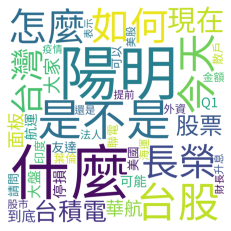

In [1]:
#ptt文章查詢器
from bs4 import BeautifulSoup as bs
from wordcloud import WordCloud
import requests
import jieba
import matplotlib.pyplot as plt

f = open('article.txt','w',encoding='UTF-8')
f.write('')
f.close()
s = requests.session()
#s.post('https://www.ptt.cc/ask/over18', data = {'from': '/bbs/Gossiping/index.html', 'yes': 'yes'})
next_page_url = 'https://www.ptt.cc/bbs/'+input('輸入看板名稱:')+'/index.html'
mm_min , dd_min = map(int,input('輸入日期(僅會查詢該日期以後的文章)(mm dd)').split(' '))
val_min = int(input('搜尋推文數高於多少(<0則搜噓文數)的文章:'))
if next_page_url == 'https://www.ptt.cc/bbs/gossiping/index.html' or next_page_url =='https://www.ptt.cc/bbs/Gossiping/index.html':
  s.post('https://www.ptt.cc/ask/over18', data = {'from': '/bbs/Gossiping/index.html', 'yes': 'yes'})
date_flag = True
count = 0
while date_flag:
  count += 1
  res = s.get(next_page_url)
  #print(res.text)
  soup = bs(res.text, 'html.parser')
  div_tags = soup.find_all('div', {'class': 'title'})
  val_tags = soup.find_all('div', {'class': 'nrec'})
  date_tags = soup.find_all('div', {'class': 'date'})
  btn = soup.select('div.btn-group > a')
  up_page_href = btn[3]['href']
  article_list = []
  pushval_list = []
  artinfo_list = []
  for val_tag in val_tags:
    num_tag= val_tag.find('span')
    #print(num_tag)
    if num_tag is None:
      pushval_list.append(0)
    else:
      pushval_list.append(num_tag.text)
  #f = open('article.txt','a',encoding='UTF-8')
  for div_tag in div_tags:
    a_tag = div_tag.find('a')
    if a_tag is not None:
      article_list.append(a_tag.text)
      #f.write(a_tag.text+'\n')
    else:
      article_list.append('本文章已被刪除')
  f.close()
  for date_tag in date_tags:
    #print(date_tag)
    d_tag = date_tag.get_text()
    artinfo_list.append(d_tag)
  article_list.reverse()
  pushval_list.reverse()
  artinfo_list.reverse()
  f = open('article.txt','a',encoding='UTF-8')
  for date,val,title in zip(artinfo_list,pushval_list,article_list):
    #print(val,type(val))
    if title !='本文章已被刪除':
      appe = title[(title.find(']')+1):]
    f.write(appe+'\n')

    m,d = map(int,date.split('/'))
    #print(m,d)
    if (m<mm_min or (m == mm_min and d < dd_min)) and count!=1:
      date_flag = False
      break
    if type(val) == str:
      if val == '爆':
        val = 100
      elif val[0] == 'X':
        if val == 'XX':
          val = int(-100)
        else: 
          val = int(val[1])*-10
      val = int(val)
      #print(val)
    if val_min>=0:
      if val>=val_min:
        if (val == 100):
          print(date,'爆',title,sep = '\t')
        else:
          print(date,val,title,sep = '\t')
    else:
      if val<=val_min:
        if (val == -100):
          print(date,'XX',title,sep = '\t')
        else:
          print(date,('X'+str(int(val/-10))),title,sep = '\t')
  f.close()
  if (date_flag) == False:
    break
  next_page_url = 'https://www.ptt.cc' + up_page_href

with open('article.txt','r',encoding = 'UTF-8') as rfile:
  text = rfile.read()
jieba.set_dictionary('/content/drive/MyDrive/Colab Notebooks/python 爬蟲/dict.txt.big')
wlist = jieba.cut(text)
words = " ".join(wlist)
wc = WordCloud(width = 1080,height = 1080,scale = 3,min_font_size=50,max_font_size=300,background_color='white',collocations=False,font_path='/content/drive/MyDrive/Colab Notebooks/python 爬蟲/SourceHanSansTW-Regular.otf').generate(words)
plt.imshow(wc)
plt.axis("off")
plt.show()